In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = np.random.randint(0, 2, size=(10, 1))
y_predicted = np.random.randint(0, 2, size=(10, 1))

# Precision

In [5]:
from sklearn.metrics import precision_score
precision_score(y,y_predicted)

0.4

In [6]:
def precision(y:np.array,y_pred:np.array):
    tp = np.sum((y == 1) & (y_pred == 1))
    fp = np.sum((y == 0) & (y_pred==1))
    if tp + fp == 0: return 0.0
    prec = tp / (tp+fp)
    return prec 

In [7]:
precision(y,y_predicted)

np.float64(0.4)

# Recall

In [9]:
from sklearn.metrics import recall_score
recall_score(y,y_predicted)

1.0

In [10]:
def recall(y:np.array,y_pred:np.array):
    tp = np.sum((y == 1) & (y_pred == 1))
    fn = np.sum((y == 1) & (y_pred==0))
    if tp + fn == 0: return 0.0
    rec = tp / (tp+fn)
    return rec 

In [11]:
recall(y,y_predicted)

np.float64(1.0)

# F1 with sklearn

In [12]:
from sklearn.metrics import f1_score
y = np.array([0,0,1,1,2,2])
y_predicted = np.array([0,1,1,0,2,2])

In [13]:
f1_score(y,y_predicted,average="macro")

0.6666666666666666

In [14]:
f1_score(y,y_predicted,average="micro")

0.6666666666666666

# ROC-AUC

In [15]:
from sklearn.metrics import roc_curve, auc , roc_auc_score

In [24]:
y = np.random.randint(0, 2, size=(10, 1)) #integer: either 0 or 1
y_predicted = np.random.rand(10,1) #Float on [0,1]
fpr, tpr, thresholds  = roc_curve(y,y_predicted)

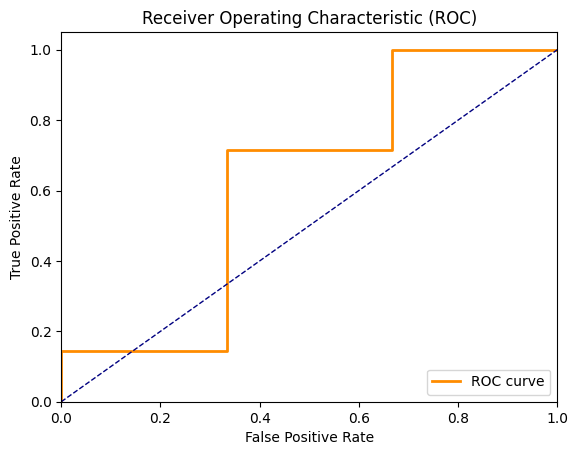

In [25]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [26]:
auc_score = auc(fpr,tpr)
print(auc_score)

## OR

auc_score_2 = roc_auc_score(y,y_predicted)
print(auc_score_2)

0.6190476190476191
0.6190476190476191


# Train-Val-Test

In [27]:
from sklearn.model_selection import train_test_split

X = np.random.rand(10000, 4) # 4 features
y = np.random.randint(0, 2, size=(10000, 1)) # 0 or 1 class
data = np.hstack((X, y))

In [29]:
train_val_data,test_data = train_test_split(data,test_size=0.2)
train_data,val_data = train_test_split(train_val_data,test_size=0.25)

print("Train:",train_data.shape)
print("Validation:",val_data.shape)
print("Test",test_data.shape)

Train: (6000, 5)
Validation: (2000, 5)
Test (2000, 5)


# K-Fold

In [30]:
from sklearn.model_selection import KFold

X = np.random.rand(10000, 4) # 4 features
y = np.random.randint(0, 2, size=(10000, 1)) # 0 or 1 class

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, val_index in kf.split(X):
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = y[train_index], y[val_index]
    
    print(f"Fold {fold}")
    print(f"Train: X={X_train.shape}, y={y_train.shape}")
    print(f"Val: X={X_test.shape}, y={y_test.shape}")
    fold += 1
    print("-"*25)

Fold 1
Train: X=(8000, 4), y=(8000, 1)
Val: X=(2000, 4), y=(2000, 1)
-------------------------
Fold 2
Train: X=(8000, 4), y=(8000, 1)
Val: X=(2000, 4), y=(2000, 1)
-------------------------
Fold 3
Train: X=(8000, 4), y=(8000, 1)
Val: X=(2000, 4), y=(2000, 1)
-------------------------
Fold 4
Train: X=(8000, 4), y=(8000, 1)
Val: X=(2000, 4), y=(2000, 1)
-------------------------
Fold 5
Train: X=(8000, 4), y=(8000, 1)
Val: X=(2000, 4), y=(2000, 1)
-------------------------


# Strafied K-Fold

In [32]:
from sklearn.model_selection import StratifiedKFold

# Örnek veri
X = np.random.rand(10000, 5)
y = np.random.randint(0, 2, size=(10000,))

In [34]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print(f"Fold {fold}")
    print(f"Train class distribution: {np.bincount(y_train)}")
    print(f"Validation class distribution: {np.bincount(y_test)}")
    fold += 1

Fold 1
Train class distribution: [4009 3991]
Validation class distribution: [1003  997]
Fold 2
Train class distribution: [4009 3991]
Validation class distribution: [1003  997]
Fold 3
Train class distribution: [4010 3990]
Validation class distribution: [1002  998]
Fold 4
Train class distribution: [4010 3990]
Validation class distribution: [1002  998]
Fold 5
Train class distribution: [4010 3990]
Validation class distribution: [1002  998]


# Repeated Strafied K-Fold

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold

X = np.random.rand(10000, 5)
y = np.random.randint(0, 2, size=(10000,))

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

fold = 1
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"Fold {fold}")
    print(f"Train class distribution: {np.bincount(y_train)}")
    print(f"Test class distribution: {np.bincount(y_test)}")
    fold += 1

Fold 1
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 2
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 3
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 4
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 5
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 6
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 7
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 8
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 9
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 10
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 11
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 12
Train class distribution: [4044 3956]
Test class distribution: [1011  989]
Fold 13
Train

# Leave P-out

In [ ]:
from sklearn.model_selection import LeavePOut

X = np.arange(5).reshape((5, 1))
y = np.arange(5)

lpo = LeavePOut(p=2)

for train_index, test_index in lpo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(f"Train indices: {train_index}, Val indices: {test_index}")

Train indices: [2 3 4], val indices: [0 1]
Train indices: [1 3 4], val indices: [0 2]
Train indices: [1 2 4], val indices: [0 3]
Train indices: [1 2 3], val indices: [0 4]
Train indices: [0 3 4], val indices: [1 2]
Train indices: [0 2 4], val indices: [1 3]
Train indices: [0 2 3], val indices: [1 4]
Train indices: [0 1 4], val indices: [2 3]
Train indices: [0 1 3], val indices: [2 4]
Train indices: [0 1 2], val indices: [3 4]


# Leave-one-out

In [ ]:
from sklearn.model_selection import LeaveOneOut

X = np.arange(10).reshape((10, 1))
y = np.arange(10)

loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(f"Train indices: {train_index}, Val index: {test_index}")

Train indices: [1 2 3 4 5 6 7 8 9], Test index: [0]
Train indices: [0 2 3 4 5 6 7 8 9], Test index: [1]
Train indices: [0 1 3 4 5 6 7 8 9], Test index: [2]
Train indices: [0 1 2 4 5 6 7 8 9], Test index: [3]
Train indices: [0 1 2 3 5 6 7 8 9], Test index: [4]
Train indices: [0 1 2 3 4 6 7 8 9], Test index: [5]
Train indices: [0 1 2 3 4 5 7 8 9], Test index: [6]
Train indices: [0 1 2 3 4 5 6 8 9], Test index: [7]
Train indices: [0 1 2 3 4 5 6 7 9], Test index: [8]
Train indices: [0 1 2 3 4 5 6 7 8], Test index: [9]


# Group-K-Fold

In [40]:
from sklearn.model_selection import GroupKFold,StratifiedGroupKFold

# Örnek veri (10 örnek, 2 özellik)
X = np.random.rand(10, 2)
y = np.random.randint(0, 2, size=10)

# Her örneğin ait olduğu grup etiketi (örneğin 4 grup var)
groups = np.array([1, 1, 2, 2, 3, 3, 4, 4, 4, 4])

gkf = GroupKFold(n_splits=3)

for fold, (train_idx, test_idx) in enumerate(gkf.split(X, y, groups)):
    print(f"Fold {fold + 1}")
    print("Train groups:", np.unique(groups[train_idx]))
    print("Val groups:", np.unique(groups[test_idx]))
    print("Train indices:", train_idx)
    print("Val indices:", test_idx)
    print()


Fold 1
Train groups: [1 2 3]
Val groups: [4]
Train indices: [0 1 2 3 4 5]
Val indices: [6 7 8 9]

Fold 2
Train groups: [2 4]
Val groups: [1 3]
Train indices: [2 3 6 7 8 9]
Val indices: [0 1 4 5]

Fold 3
Train groups: [1 3 4]
Val groups: [2]
Train indices: [0 1 4 5 6 7 8 9]
Val indices: [2 3]



# Plot Train-Val

In [41]:
train_loss = np.array([1.        , 0.93571429, 0.87142857, 0.80714286, 0.74285714,
       0.67857143, 0.61428571, 0.55      , 0.48571429, 0.42142857,
       0.35714286, 0.29285714, 0.22857143, 0.16428571, 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ])
val_loss = np.array([1.05      , 0.98571429, 0.92142857, 0.85714286, 0.79285714,
       0.72857143, 0.66428571, 0.6       , 0.53571429, 0.47142857,
       0.40714286, 0.34285714, 0.27857143, 0.21428571, 0.15      ,
       0.15      , 0.15      , 0.15      , 0.15      , 0.15      ])

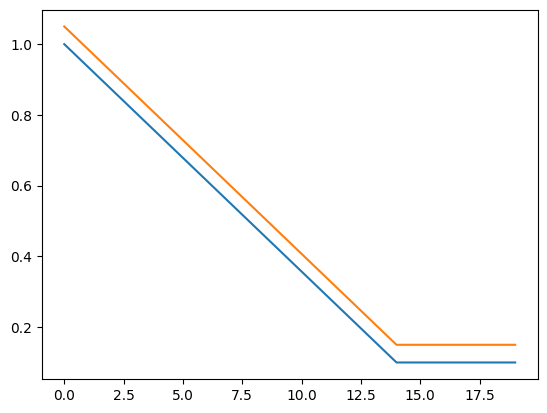

In [42]:
plt.plot(train_loss)
plt.plot(val_loss)

# Grid Search

In [43]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

model = xgb.XGBClassifier(eval_metric='logloss')

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

grid_search = GridSearchCV(model, param_grid, cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X, y)

print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"Params: {params} - Mean CV Accuracy: {mean_score:.4f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Best CV score: 0.9789102385593612
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7} - Mean CV Accuracy: 0.9315
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1} - Mean CV Accuracy: 0.9280
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7} - Mean CV Accuracy: 0.9508
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1} - Mean CV Accuracy: 0.9385
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7} - Mean CV Accuracy: 0.9333
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsam

# Random Search

In [44]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

X, y = load_breast_cancer(return_X_y=True)

model = xgb.XGBClassifier(eval_metric='logloss')

param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 200),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.4,0.6)
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X, y)

print("Best params:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

for mean_score, params in zip(random_search.cv_results_['mean_test_score'], random_search.cv_results_['params']):
    print(f"Params: {params} - Mean CV Accuracy: {mean_score:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'colsample_bytree': np.float64(0.8483920660824285), 'learning_rate': np.float64(0.17190763971672393), 'max_depth': 4, 'n_estimators': 173, 'subsample': np.float64(0.7103996728090174)}
Best CV score: 0.977155852594449
Params: {'colsample_bytree': np.float64(0.6247240713084175), 'learning_rate': np.float64(0.2952142919229748), 'max_depth': 5, 'n_estimators': 121, 'subsample': np.float64(0.8394633936788146)} - Mean CV Accuracy: 0.9684
Params: {'colsample_bytree': np.float64(0.4936111842654619), 'learning_rate': np.float64(0.05679835610086079), 'max_depth': 5, 'n_estimators': 137, 'subsample': np.float64(0.7334834444556088)} - Mean CV Accuracy: 0.9719
Params: {'colsample_bytree': np.float64(0.48572009075316447), 'learning_rate': np.float64(0.20526654188465587), 'max_depth': 7, 'n_estimators': 51, 'subsample': np.float64(0.8887995089067299)} - Mean CV Accuracy: 0.9701
Params: {'colsample_bytree': np.float64(0.9631316